### Step:1 Import & Read Section

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [54]:
## California ACT and SAT files.
act19_ca = pd.read_csv(r'../project_1/data/act_2019_ca.csv')
sat19_ca = pd.read_csv(r'../project_1/data/sat_2019_ca.csv')

In [55]:
### Additional Files
act17_ca = pd.read_excel(r'./additional data/ACT17_CA.xlsx',skiprows=5)
act18_ca = pd.read_excel(r'./additional data/ACT18_CA.xlsx',skiprows=5)
act20_ca = pd.read_excel(r'./additional data/ACT20_CA.xlsx',skiprows=5)
sat17_ca = pd.read_excel(r'./additional data/SAT17_CA.xlsx')
sat18_ca = pd.read_excel(r'./additional data/SAT18_CA.xlsx')
sat20_ca = pd.read_excel(r'./additional data/SAT20_CA.xlsx',skiprows=5)

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


#### Year Adding

In [56]:
act17_ca['Year'] = '2016-17'
act18_ca['Year'] = '2017-18'
act20_ca['Year'] = '2019-20'
sat17_ca['Year'] = '2016-17'
sat18_ca['Year'] = '2017-18'
sat20_ca['Year'] = '2019-20'

#### Columns Rename

In [57]:
list = ['act17_ca','act18_ca','act20_ca','sat17_ca','sat18_ca','sat20_ca']
for i in list:
    globals()[i] = globals()[i].rename(columns={'Rtype':'RType','Sname':'SName','Dname':'DName','Cname':'CName'})

In [58]:
act17_ca.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'NumTstTakr',
       'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21',
       'PctGE21', 'Year'],
      dtype='object')

In [59]:
act17_ca.head()

,CDS,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
0,0,X,State of California,State of California,State of California,484169.0,109506.0,22,23,22,22,63629,58.11,2016-17
1,1000000000000,C,NaN,NaN,Alameda,16638.0,4587.0,24,25,25,24,3193,69.61,2016-17
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,253.0,9.0,*,*,*,*,*,*,2016-17
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,81.0,9.0,*,*,*,*,*,*,2016-17
4,1316170131763,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,86.0,26.0,12,16,16,16,1,3.85,2016-17


### SAT Rename

##### SAT (19-20) Rename

In [60]:
dict_cols = {'NumTSTTakr12':'ttk12', 'NumERWBenchmark12':'erw12', 'PctERWBenchmark12':'erw12_perc',
       'NumMathBenchmark12':'math12', 'PctMathBenchmark12':'math12_perc'
             ,'NumTSTTakr11':'ttk11',
       'NumERWBenchmark11':'erw11', 'PctERWBenchmark11':'erw11_perc', 'NumMathBenchmark11':'math11',
       'PctMathBenchmark11':'math11_perc', 'TotNumBothBenchmark12':'tot12', 'PctBothBenchmark12':'tot12_perc',
       'TotNumBothBenchmark11':'tot11', 'PctBothBenchmark11':'tot11_perc'
             ,'Rtype':'RType','Sname':'SName','Dname':'DName','Cname':'CName'
             ,'cds':'CDS', 'rtype':'RType', 'sname':"SName",
       'dname':'DName', 'cname':'CName','dname':'DName', 'cname':'CName','enroll12':'Enroll12','year':'Year'}

In [61]:
sat19_ca = sat19_ca.rename(columns=dict_cols)
sat20_ca = sat20_ca.rename(columns=dict_cols)

In [62]:
sat19_ca.columns

Index(['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'ttk12', 'erw12', 'erw12_perc', 'math12', 'math12_perc',
       'Enroll11', 'ttk11', 'erw11', 'erw11_perc', 'math11', 'math11_perc',
       'tot12', 'tot12_perc', 'tot11', 'tot11_perc', 'Year'],
      dtype='object')

#### SAT (17-18) Rename

In [63]:
dict_cols_new = {'NumTstTakr':'ttk12',
       'NumCurrElaBenchmark':'erw12', 'NumPreElaBenchmark':'nperw', 'TotNumElaBenchmark':'toterw',
       'PctElaBenchmark':'erw12_perc', 'NumCurrMathBenchmark':'math12', 'NumPreMathBenchmark':'npmath',
       'TotNumMathBenchmark':'totmath', 'PctMathBenchmark':'math12_perc', 'TotNumBothBenchmark':'tot12',
       'PctBothBenchmark':'tot12_perc'
                 ,'Rtype':'RType','Sname':'SName','Dname':'DName','Cname':'CName'
                 ,'cds':'CDS', 'rtype':'RType', 'sname':"SName",'dname':'DName', 'cname':'CName','enroll12':'Enroll12','year':'Year'}

In [64]:
list = ['sat17_ca','sat18_ca']
for i in list:
    globals()[i] = globals()[i].rename(columns=dict_cols_new)

In [65]:
sat18_ca.columns

Index(['CDS', 'Ccode', 'CDcode', 'Scode', 'RType', 'SName', 'DName', 'CName',
       'Enroll12', 'ttk12', 'erw12', 'nperw', 'toterw', 'erw12_perc', 'math12',
       'npmath', 'totmath', 'math12_perc', 'tot12', 'tot12_perc', 'Year'],
      dtype='object')

In [66]:
#sat17_ca = sat17_ca.rename(columns=dict_cols)
sat17_ca.head()

,CDS,RType,SName,DName,CName,Enroll12,ttk12,erw12,nperw,toterw,erw12_perc,math12,npmath,totmath,math12_perc,tot12,tot12_perc,Year
0,0,X,State of California,State of California,State of California,484169,221433,144893,15103,159996,72.25,98504,13887,112391,50.76,107173,48.40,2016-17
1,1000000000000,C,NaN,NaN,Alameda,16638,9029,5407,1376,6783,75.12,4033,1337,5370,59.48,5147,57.01,2016-17
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,253,83,28,0,28,33.73,9,0,9,10.84,9,10.84,2016-17
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,81,83,28,0,28,33.73,9,0,9,10.84,9,10.84,2016-17
4,1611190000000,D,NaN,Alameda Unified,Alameda,910,495,373,51,424,85.66,298,47,345,69.70,330,66.67,2016-17


#### Concatenate SAT & ACT.

In [67]:
act_ca = pd.concat([act17_ca,act18_ca,act19_ca,act20_ca])
sat_ca = pd.concat([sat17_ca,sat18_ca,sat19_ca,sat20_ca])

### Step2 .Missing Value Visualization

In [68]:
def missing_function(var,name):    
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    msno.bar(var,ax=ax[0])
    msno.matrix(var,ax=ax[1])
    ax[0].set_title('Missing Value by Features of '+name)
    ax[1].set_title('Missing Value by Locations of '+name)
    ax[1].set_ylabel('Row')

#### ACT Missing Value Visualization

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


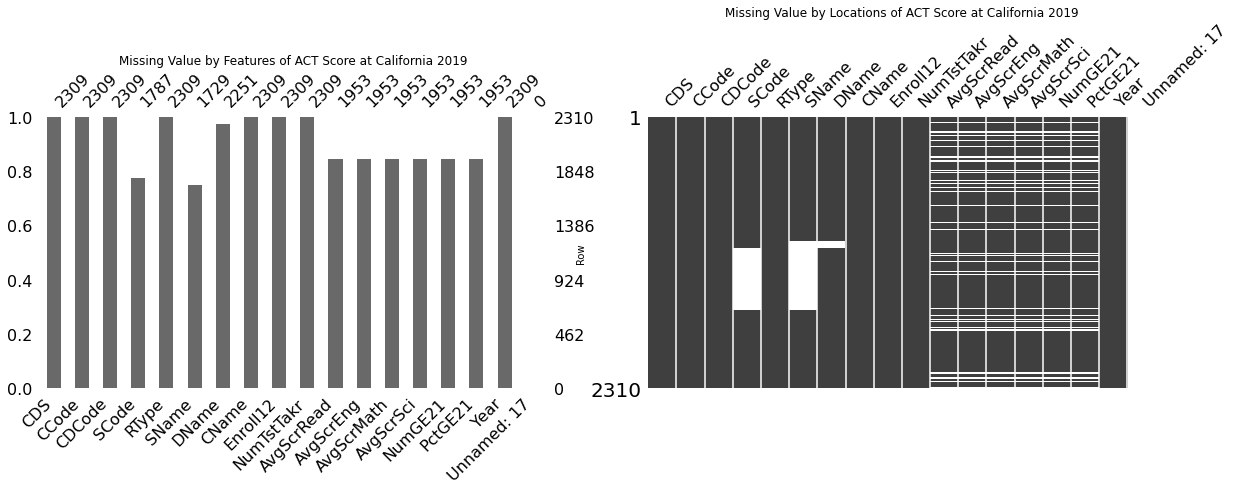

In [69]:
missing_function(act19_ca,'ACT Score at California 2019')

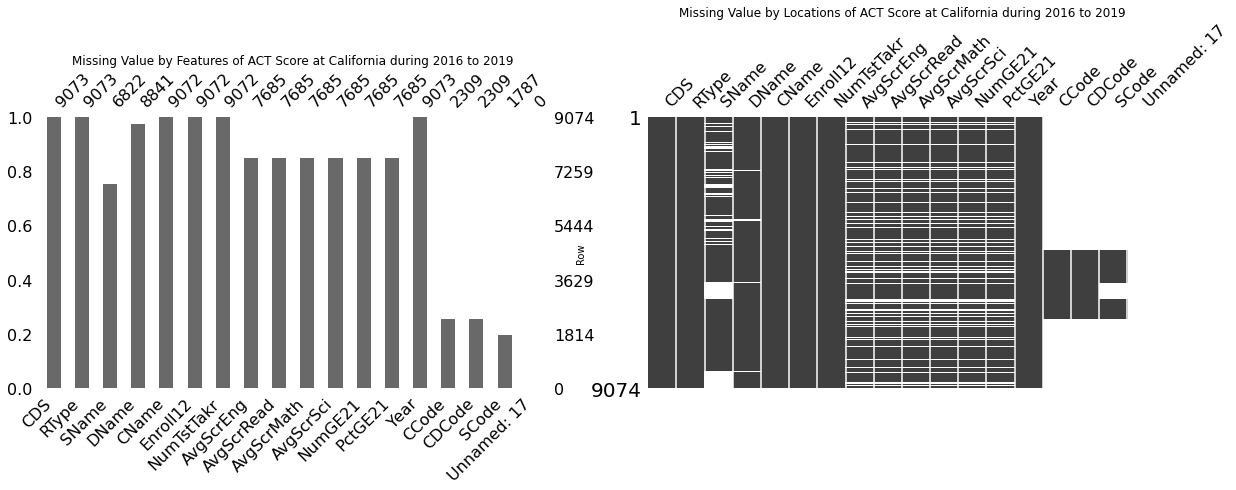

In [70]:
missing_function(act_ca,'ACT Score at California during 2016 to 2019')

#### SAT Missing Value Visualization

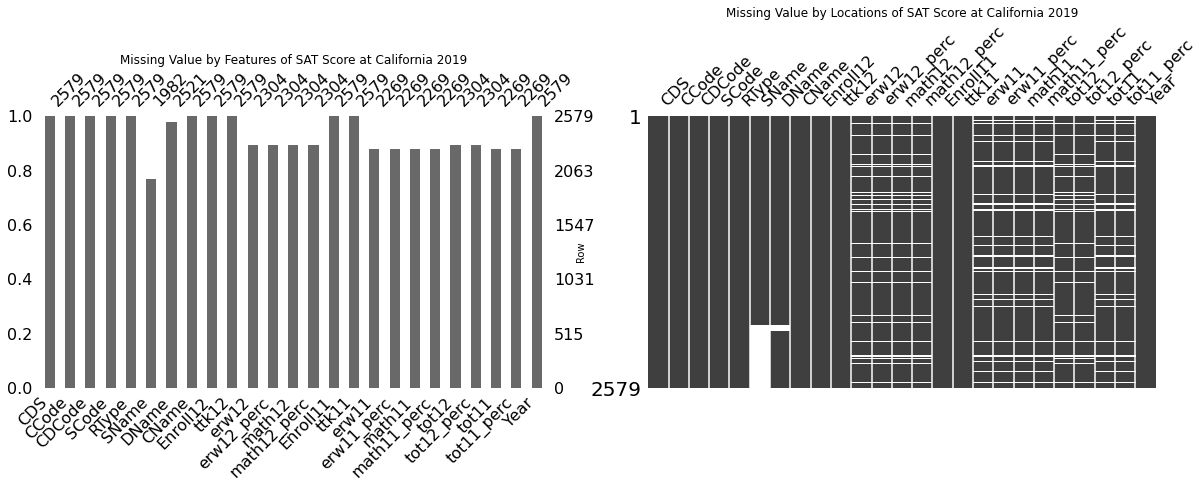

In [71]:
missing_function(sat19_ca,'SAT Score at California 2019')

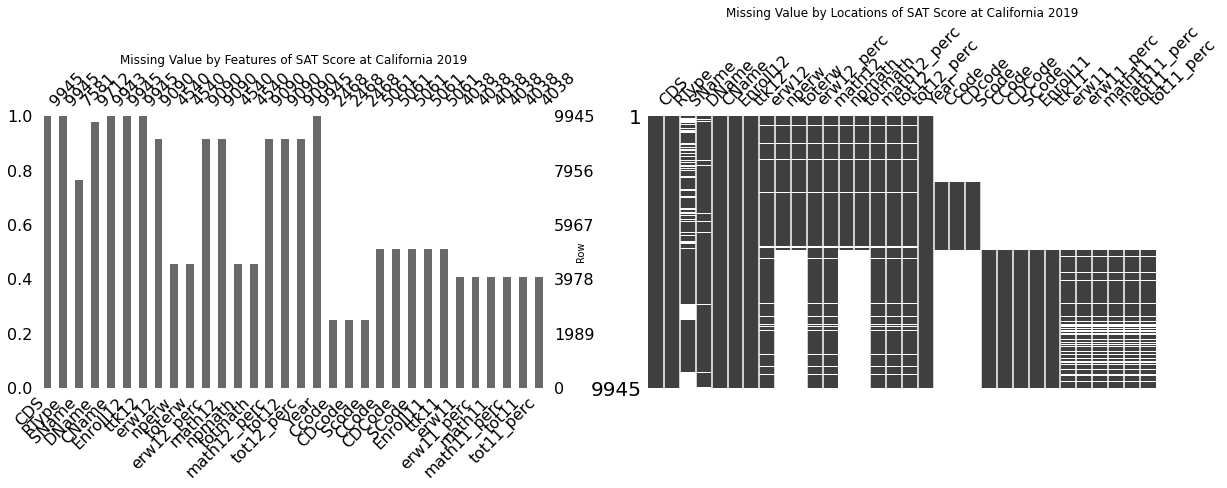

In [72]:
missing_function(sat_ca,'SAT Score at California 2019')

#### Drop Unwanted Columns

ACT

In [73]:
act_ca_new = act_ca.drop(['CCode','CDCode','SCode','Unnamed: 17'],axis=1)

SAT

In [74]:
sat_ca.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'ttk12', 'erw12',
       'nperw', 'toterw', 'erw12_perc', 'math12', 'npmath', 'totmath',
       'math12_perc', 'tot12', 'tot12_perc', 'Year', 'Ccode', 'CDcode',
       'Scode', 'CCode', 'CDCode', 'SCode', 'Enroll11', 'ttk11', 'erw11',
       'erw11_perc', 'math11', 'math11_perc', 'tot11', 'tot11_perc'],
      dtype='object')

In [81]:
sat_ca_new = sat_ca.drop(['CCode','CDCode','SCode','Ccode','CDcode','Scode',
                          'Enroll11', 'ttk11', 'erw11','erw11_perc', 'math11',
                          'math11_perc', 'tot11', 'tot11_perc'],axis=1)

In [82]:
sat_ca_new.columns

Index(['CDS', 'RType', 'SName', 'DName', 'CName', 'Enroll12', 'ttk12', 'erw12',
       'nperw', 'toterw', 'erw12_perc', 'math12', 'npmath', 'totmath',
       'math12_perc', 'tot12', 'tot12_perc', 'Year'],
      dtype='object')

#### Missing Values Filling out

In [83]:
act_ca_new['SName'] = act_ca_new['SName'].fillna('-')
act_ca_new['DName'] = act_ca_new['DName'].fillna('-')

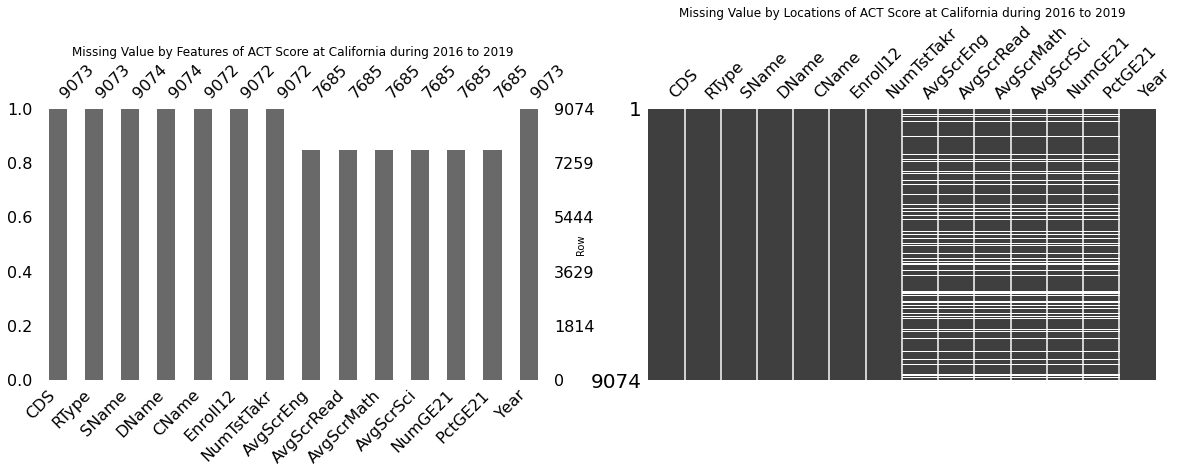

In [84]:
missing_function(act_ca_new,'ACT Score at California during 2016 to 2019')

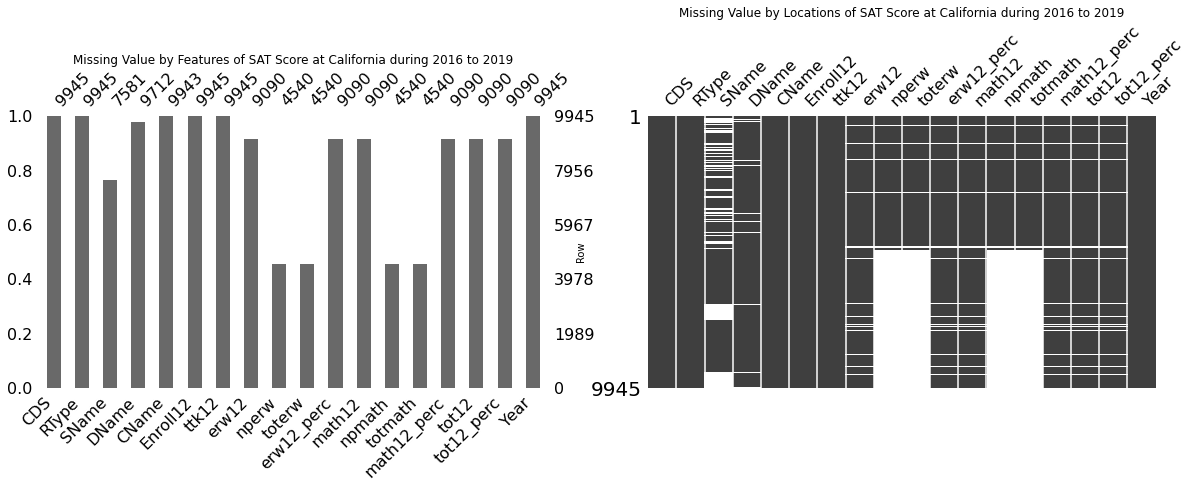

In [85]:
missing_function(sat_ca_new,'SAT Score at California during 2016 to 2019')